# Import libraries

In [77]:
import pandas as pd
import pg8000
import numpy as np
import matplotlib.pyplot     as plt
import matplotlib.patches    as mpatches
import seaborn               as sns
import sweetviz as sv
import sklearn.metrics       as Metrics
%matplotlib inline

# Read file

In [78]:
df = pd.read_csv('C:/Users/USER/OneDrive - universidadean.edu.co/3. Machine learning/Proyecto final/datos_granja.csv',sep=";")


In [79]:
df

,Fecha,CO,Ciudad,Temperatura,Depto,Consumo,Unidades,Edad,Sexo,TipoGranja,Peso
0,17/07/2024,E45,Fusagasuga,21,Cundinamarca,695.250000,10057.0,31,machos,MANUAL,1.718
1,17/07/2024,E45,Fusagasuga,21,Cundinamarca,695.250000,10057.0,31,hembras,MANUAL,1.718
2,17/07/2024,E45,Fusagasuga,21,Cundinamarca,676.812500,7298.0,31,machos,MANUAL,1.943
3,17/07/2024,E45,Fusagasuga,21,Cundinamarca,676.812500,7298.0,31,hembras,MANUAL,1.943
4,17/07/2024,E08,Sasaima,26,Cundinamarca,196.575758,2977.0,32,hembras,MANUAL,1.598
...,...,...,...,...,...,...,...,...,...,...,...
1752,17/10/2024,E25,Restrepo,29,Meta,577.322581,7521.0,30,machos,MANUAL,1.817
1753,17/10/2024,E25,Restrepo,29,Meta,577.322581,7521.0,30,hembras,MANUAL,1.817
1754,17/10/2024,E25,Restrepo,29,Meta,577.322581,7521.0,30,hembras,MANUAL,1.817
1755,17/10/2024,E25,Restrepo,29,Meta,577.322581,7521.0,30,hembras,MANUAL,1.817


# Normalize_cols

In [80]:
def remove_accents_cols(df_cols):
    return df_cols.str.replace('ñ','ni').str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
def remove_special_chars(df_cols):
    return df_cols.str.replace(r'[$@&/.:-]',' ', regex=True)
def regular_camel_case(snake_str):
    components = snake_str.split('_')
    return components[0] + ''.join(x.title() for x in components[1:])
def regular_snake_case(df_cols):
    cols = df_cols.str.replace('ñ','ni')
    cols = cols.str.lower().str.replace('/',' ').str.replace('.',' ').str.strip()
    cols = cols.str.replace(r'\s+',' ',regex=True)
    cols = cols.str.replace(' ','_')
    return cols

In [81]:
df.columns = remove_accents_cols(df.columns)
df.columns = remove_special_chars(df.columns)
df.columns = regular_snake_case(df.columns)

In [82]:
df

,fecha,co,ciudad,temperatura,depto,consumo,unidades,edad,sexo,tipogranja,peso
0,17/07/2024,E45,Fusagasuga,21,Cundinamarca,695.250000,10057.0,31,machos,MANUAL,1.718
1,17/07/2024,E45,Fusagasuga,21,Cundinamarca,695.250000,10057.0,31,hembras,MANUAL,1.718
2,17/07/2024,E45,Fusagasuga,21,Cundinamarca,676.812500,7298.0,31,machos,MANUAL,1.943
3,17/07/2024,E45,Fusagasuga,21,Cundinamarca,676.812500,7298.0,31,hembras,MANUAL,1.943
4,17/07/2024,E08,Sasaima,26,Cundinamarca,196.575758,2977.0,32,hembras,MANUAL,1.598
...,...,...,...,...,...,...,...,...,...,...,...
1752,17/10/2024,E25,Restrepo,29,Meta,577.322581,7521.0,30,machos,MANUAL,1.817
1753,17/10/2024,E25,Restrepo,29,Meta,577.322581,7521.0,30,hembras,MANUAL,1.817
1754,17/10/2024,E25,Restrepo,29,Meta,577.322581,7521.0,30,hembras,MANUAL,1.817
1755,17/10/2024,E25,Restrepo,29,Meta,577.322581,7521.0,30,hembras,MANUAL,1.817


# General stats cells

In [83]:
df.describe()

,temperatura,consumo,unidades,edad,peso
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000
mean,25.105293,1012.022232,10074.742266,30.896414,1.735418
std,5.577857,2472.231794,8743.540596,4.896023,0.413089
min,12.000000,-0.736842,6.161000,5.000000,0.155000
25%,23.000000,444.517241,6957.000000,28.000000,1.553000
50%,23.000000,554.451613,7521.000000,31.000000,1.760000
75%,29.000000,714.625000,10686.000000,33.000000,1.929000
max,34.000000,22939.926190,123412.000000,45.000000,7.000000


In [84]:
df.dtypes


fecha           object
co              object
ciudad          object
temperatura      int64
depto           object
consumo        float64
unidades       float64
edad             int64
sexo            object
tipogranja      object
peso           float64
dtype: object

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        1757 non-null   object 
 1   co           1757 non-null   object 
 2   ciudad       1757 non-null   object 
 3   temperatura  1757 non-null   int64  
 4   depto        1757 non-null   object 
 5   consumo      1757 non-null   float64
 6   unidades     1757 non-null   float64
 7   edad         1757 non-null   int64  
 8   sexo         1757 non-null   object 
 9   tipogranja   1757 non-null   object 
 10  peso         1757 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 151.1+ KB


In [86]:
print('recuento de columnas por tipo: ', df.dtypes.value_counts())
print('sumatoria de valores nulos en el dataframe: ', df.isna().sum())

recuento de columnas por tipo:  object     6
float64    3
int64      2
Name: count, dtype: int64
sumatoria de valores nulos en el dataframe:  fecha          0
co             0
ciudad         0
temperatura    0
depto          0
consumo        0
unidades       0
edad           0
sexo           0
tipogranja     0
peso           0
dtype: int64


# General Analyst by columns

## fecha
type: object

In [87]:
df['fecha'] = pd.to_datetime(df[f'fecha'], errors='coerce')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28884\1855218371.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['fecha'] = pd.to_datetime(df[f'fecha'], errors='coerce')


In [88]:
print('la columna fecha es: ',df[f'fecha'].dtype)

la columna fecha es:  datetime64[ns]


## co
type: object

In [89]:
df['co'] = df['co'].astype(str)
df['co'] = df['co'].str.replace('.0','')
df['co'].unique()

array(['E45', 'E08', 'E24', 'E33', 'E25', 'E76', 'E27', 'E89', 'E11',
       'E55', 'E95', 'E77', 'E10', 'E19', 'F01', 'F03', 'E74', 'E37',
       'E46', 'EA6', 'E38', 'E32', 'E09', 'E56', 'E20', 'E40', 'E93',
       'E14', 'E90', 'F02', 'E34', 'E02', 'E30', 'E72', 'E36', 'E61',
       'E60', 'F04', 'E13', 'E87', 'E05', 'E31', 'E59', 'E29'],
      dtype=object)

In [90]:
df['co'].value_counts()

co
E25    356
E90    148
E77    124
EA6    112
E19     65
E37     64
E74     56
E27     54
E09     53
E89     53
E38     42
E46     42
E29     39
E30     37
E95     36
E32     36
E08     35
E93     33
E33     33
E20     32
E24     31
E11     29
E34     26
E60     22
F04     20
E45     20
E59     16
E76     14
E55     13
E56     13
F02     12
E02     12
F03     12
E40     10
E72     10
E13      9
E10      8
F01      8
E87      6
E14      4
E61      4
E05      3
E31      3
E36      2
Name: count, dtype: int64

<Axes: ylabel='count'>

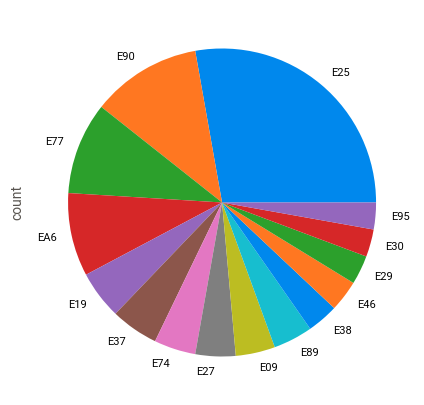

In [91]:
plt.figure(figsize=(10,5))
df['co'].value_counts()[:15].plot(kind='pie')

<Axes: ylabel='co'>

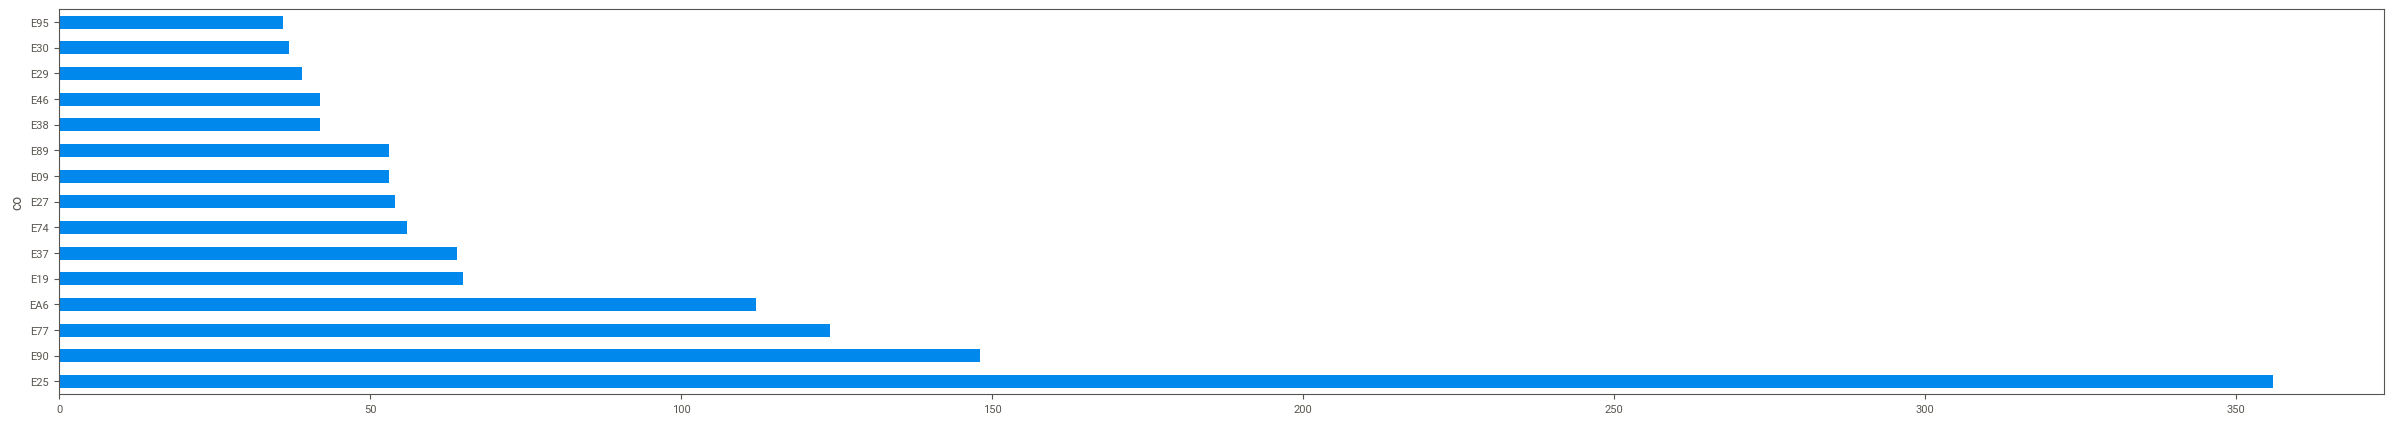

In [92]:
plt.figure(figsize=(30,5))
df['co'].value_counts()[:15].plot(kind='barh')

## ciudad
type: object

In [93]:
df['ciudad'] = df['ciudad'].astype(str)
df['ciudad'] = df['ciudad'].str.replace('.0','')
df['ciudad'].unique()

array(['Fusagasuga', 'Sasaima', 'Arbelaez', 'Restrepo', 'Cabuyaro',
       'Cumaral', 'Granada', 'Paratebueno', 'Silvania', 'Facatativa',
       'Nilo', 'La Mesa', 'Villeta                        ',
       'La Vega                        '], dtype=object)

In [94]:
df['ciudad'].value_counts()

ciudad
Restrepo                           356
Silvania                           236
Arbelaez                           232
Fusagasuga                         225
Cumaral                            142
Sasaima                            125
Facatativa                         112
Granada                             97
Cabuyaro                            81
Paratebueno                         74
Nilo                                49
La Mesa                             13
Villeta                             12
La Vega                              3
Name: count, dtype: int64

<Axes: ylabel='count'>

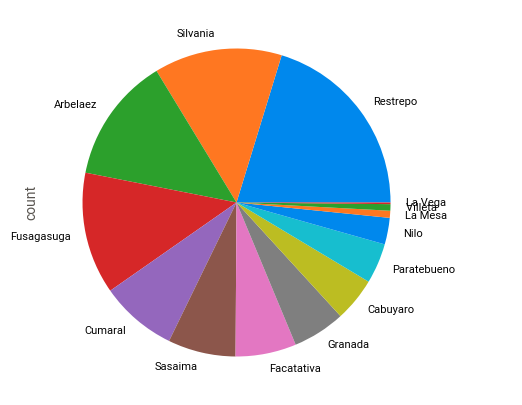

In [95]:
plt.figure(figsize=(10,5))
df['ciudad'].value_counts()[:15].plot(kind='pie')

<Axes: ylabel='ciudad'>

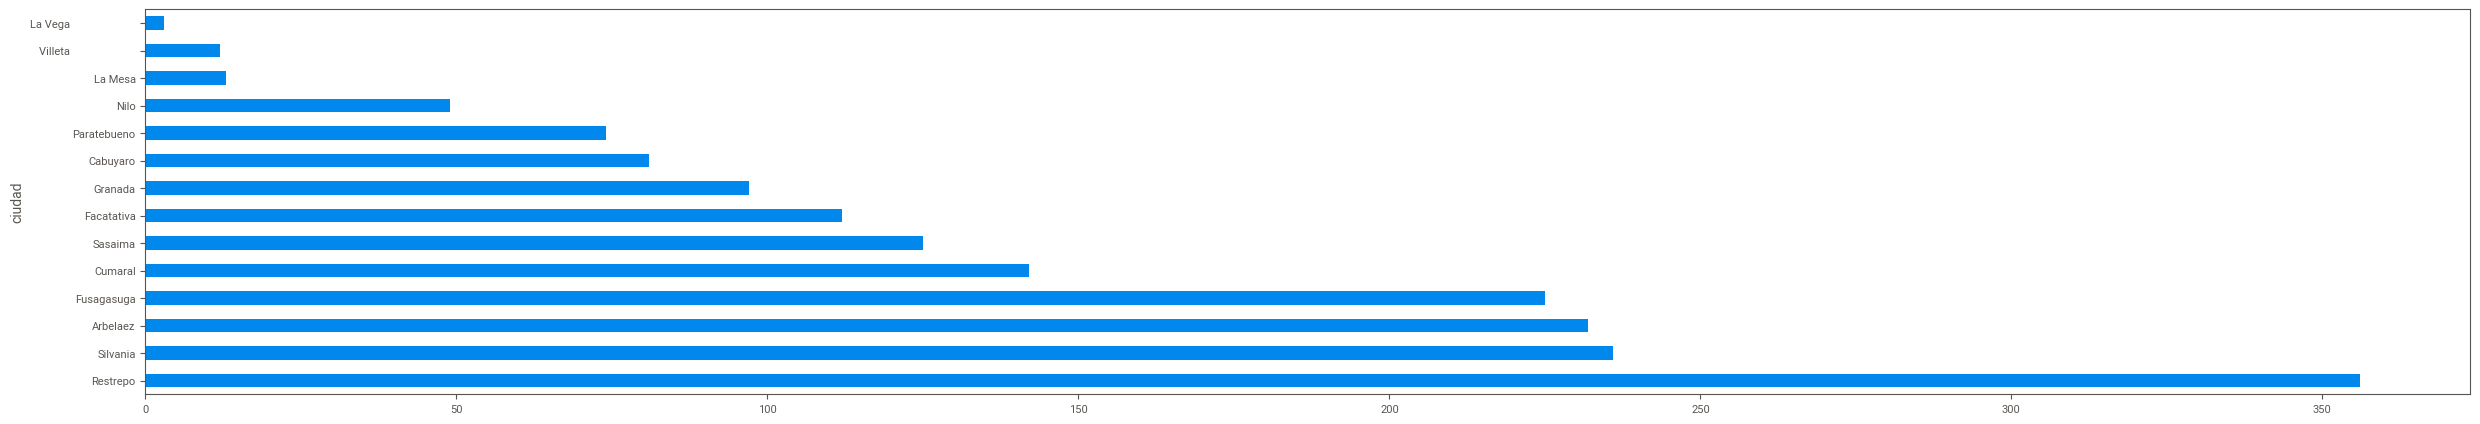

In [96]:
plt.figure(figsize=(30,5))
df['ciudad'].value_counts()[:15].plot(kind='barh')

## temperatura
type: int64

In [97]:
df['temperatura'] = df['temperatura'].astype(str)

In [98]:
df['temperatura'] = df['temperatura'].str.replace('.0','')

In [99]:
df['temperatura'].unique()

array(['21', '26', '23', '29', '34', '30', '18', '12', '32', '28', '27'],
      dtype=object)

In [100]:
df['temperatura'].value_counts()

temperatura
23    468
29    356
21    225
34    168
30    142
26    125
12    112
18     97
32     49
28     12
27      3
Name: count, dtype: int64

<Axes: ylabel='count'>

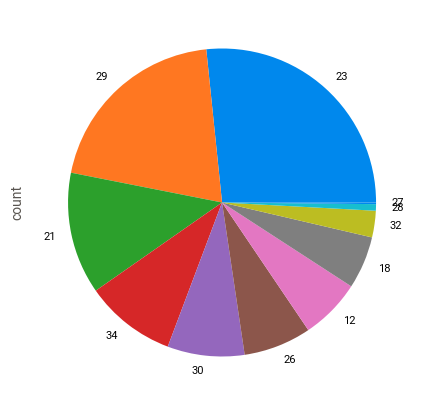

In [101]:
plt.figure(figsize=(10,5))
df['temperatura'].value_counts()[:15].plot(kind='pie')

<Axes: ylabel='temperatura'>

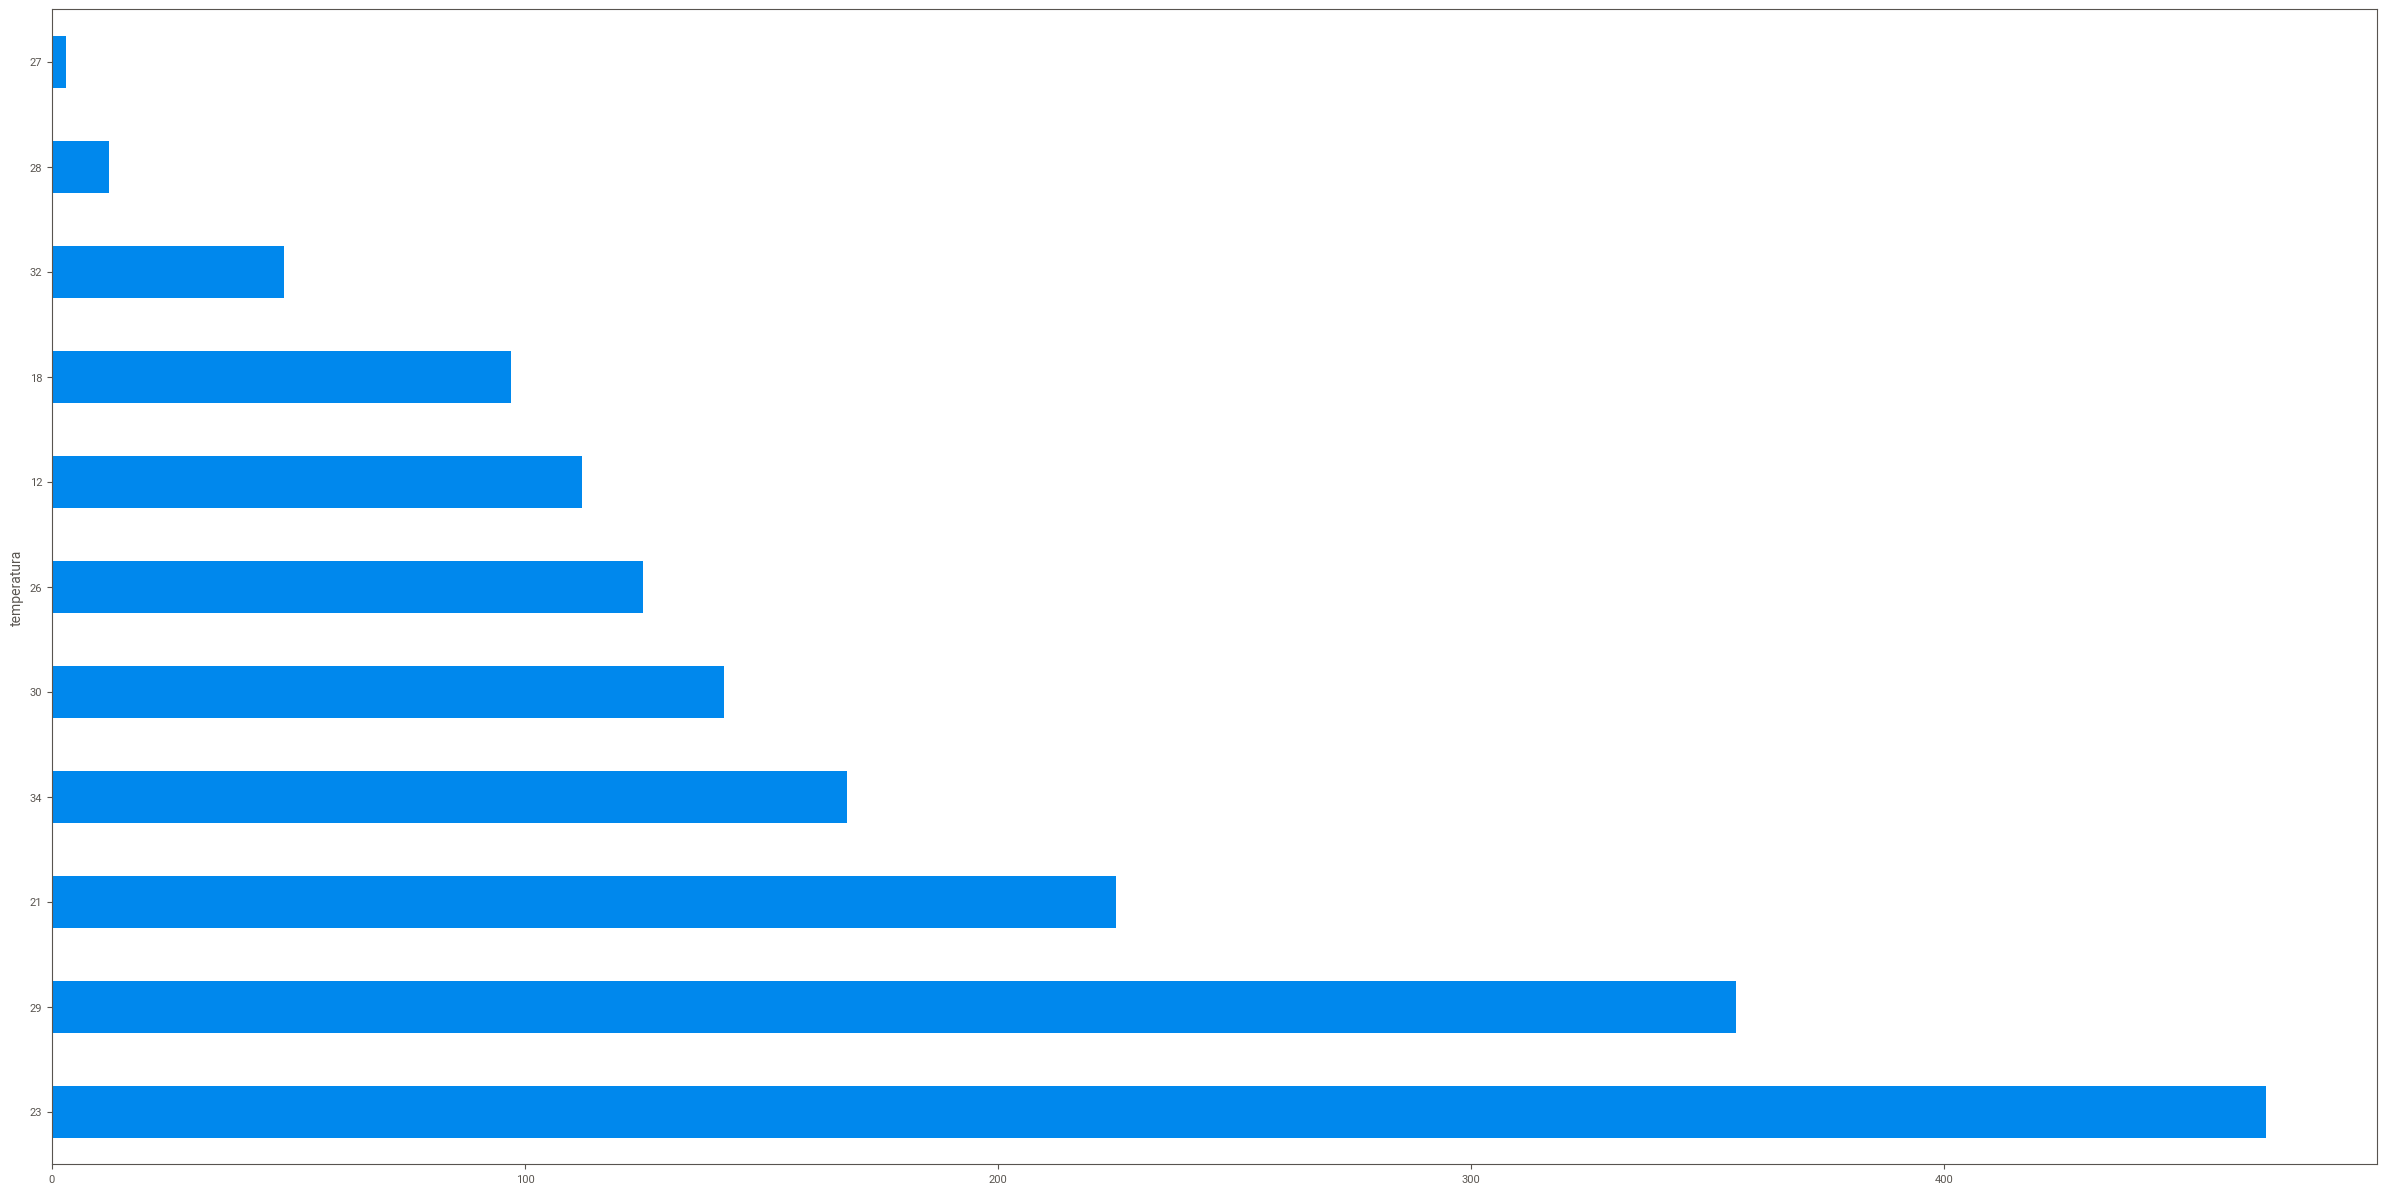

In [102]:
plt.figure(figsize=(30,15))
df['temperatura'].value_counts()[:15].plot(kind='barh')

## depto
type: object

In [103]:
df['depto'] = df['depto'].astype(str)
df['depto'] = df['depto'].str.replace('.0','')
df['depto'].unique()

array(['Cundinamarca', 'Meta'], dtype=object)

In [104]:
df['depto'].value_counts()

depto
Cundinamarca    1178
Meta             579
Name: count, dtype: int64

<Axes: ylabel='count'>

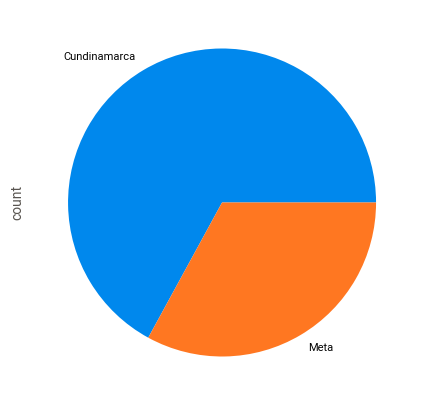

In [105]:
plt.figure(figsize=(10,5))
df['depto'].value_counts()[:15].plot(kind='pie')

<Axes: ylabel='depto'>

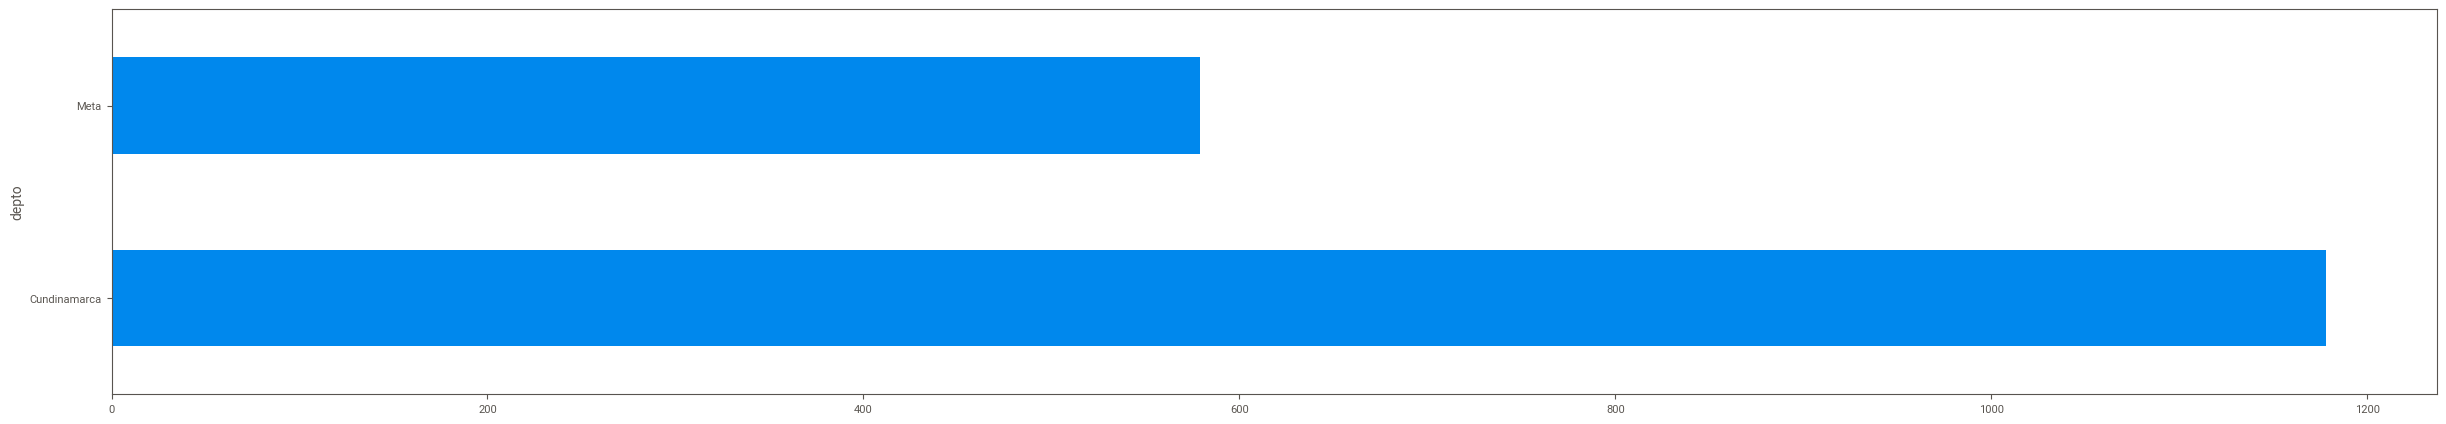

In [106]:
plt.figure(figsize=(30,5))
df['depto'].value_counts()[:15].plot(kind='barh')

## consumo
type: float64

In [107]:
df['consumo'] = pd.to_numeric(df[f'consumo'], errors='coerce')

In [108]:
print('la media es: ',df['consumo'].mean())

la media es:  1012.0222315546231


In [109]:
print('la moda es: ',df['consumo'].mode())

la moda es:  0     35.000000
1    605.848485
Name: consumo, dtype: float64


In [110]:
print('la mediana es: ',df['consumo'].median())

la mediana es:  554.4516129


In [111]:
print('el valor mínimo de consumo es: : ',df['consumo'].min())

el valor mínimo de consumo es: :  -0.736842105


In [112]:
print('el valor máximo de consumo es: : ',df['consumo'].max())

el valor máximo de consumo es: :  22939.92619


In [113]:
print('el rango de consumo es: : ',df['consumo'].max() - df['consumo'].min())

el rango de consumo es: :  22940.663032105


In [114]:
print('la desviación éstandar de consumo es: : ',df['consumo'].std())

la desviación éstandar de consumo es: :  2472.2317937047383


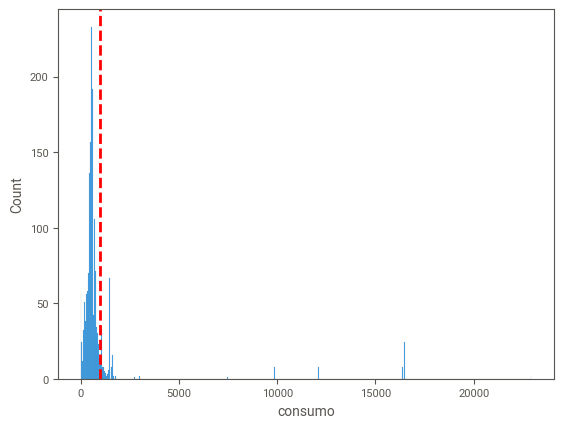

In [115]:
sns.histplot(data = df,x = 'consumo')
plt.axvline(x=df['consumo'].mean(),color='red',linestyle='dashed',linewidth=2)

## unidades
type: float64

In [116]:
df['unidades'] = pd.to_numeric(df[f'unidades'], errors='coerce')

In [117]:
print('la media es: ',df['unidades'].mean())

la media es:  10074.742265793966


In [118]:
print('la moda es: ',df['unidades'].mode())

la moda es:  0    7455.0
Name: unidades, dtype: float64


In [119]:
print('la mediana es: ',df['unidades'].median())

la mediana es:  7521.0


In [120]:
print('el valor mínimo de unidades es: : ',df['unidades'].min())

el valor mínimo de unidades es: :  6.161


In [121]:
print('el valor máximo de unidades es: : ',df['unidades'].max())

el valor máximo de unidades es: :  123412.0


In [122]:
print('el rango de unidades es: : ',df['unidades'].max() - df['unidades'].min())

el rango de unidades es: :  123405.839


In [123]:
print('la desviación éstandar de unidades es: : ',df['unidades'].std())

la desviación éstandar de unidades es: :  8743.540595864788


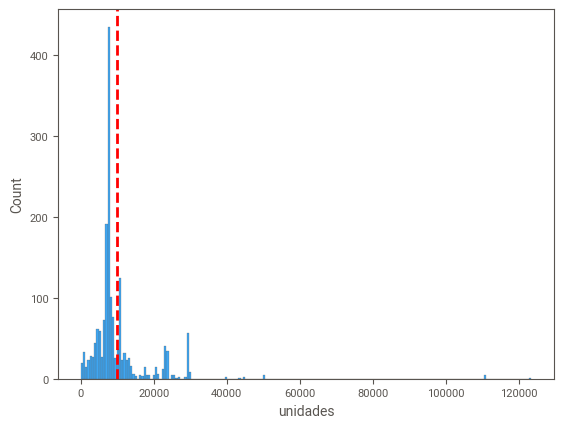

In [124]:
sns.histplot(data = df,x = 'unidades')
plt.axvline(x=df['unidades'].mean(),color='red',linestyle='dashed',linewidth=2)

## edad
type: int64

In [125]:
df['edad'] = pd.to_numeric(df[f'edad'], errors='coerce')

In [126]:
print('la media es: ',df['edad'].mean())

la media es:  30.89641434262948


In [127]:
print('la moda es: ',df['edad'].mode())

la moda es:  0    28
Name: edad, dtype: int64


In [128]:
print('la mediana es: ',df['edad'].median())

la mediana es:  31.0


In [129]:
print('el valor mínimo de edad es: : ',df['edad'].min())

el valor mínimo de edad es: :  5


In [130]:
print('el valor máximo de edad es: : ',df['edad'].max())

el valor máximo de edad es: :  45


In [131]:
print('el rango de edad es: : ',df['edad'].max() - df['edad'].min())

el rango de edad es: :  40


In [132]:
print('la desviación éstandar de edad es: : ',df['edad'].std())

la desviación éstandar de edad es: :  4.896022943828117


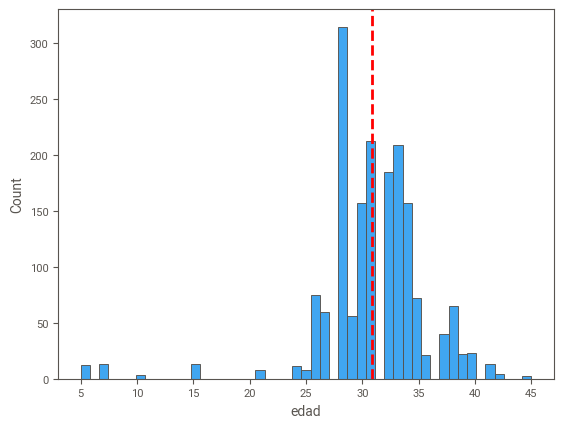

In [133]:
sns.histplot(data = df,x = 'edad')
plt.axvline(x=df['edad'].mean(),color='red',linestyle='dashed',linewidth=2)

## sexo
type: object

In [134]:
df['sexo'] = df['sexo'].astype(str)
df['sexo'] = df['sexo'].str.replace('.0','')
df['sexo'].unique()

array(['machos', 'hembras'], dtype=object)

In [135]:
df['sexo'].value_counts()

sexo
machos     916
hembras    841
Name: count, dtype: int64

<Axes: ylabel='count'>

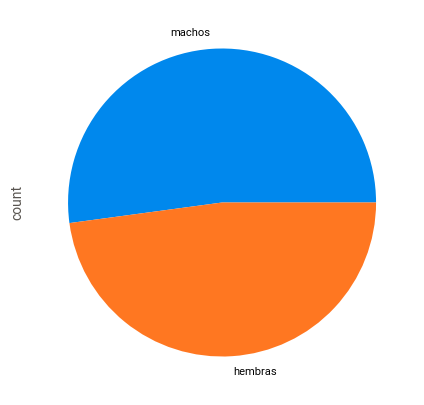

In [136]:
plt.figure(figsize=(10,5))
df['sexo'].value_counts()[:15].plot(kind='pie')

<Axes: ylabel='sexo'>

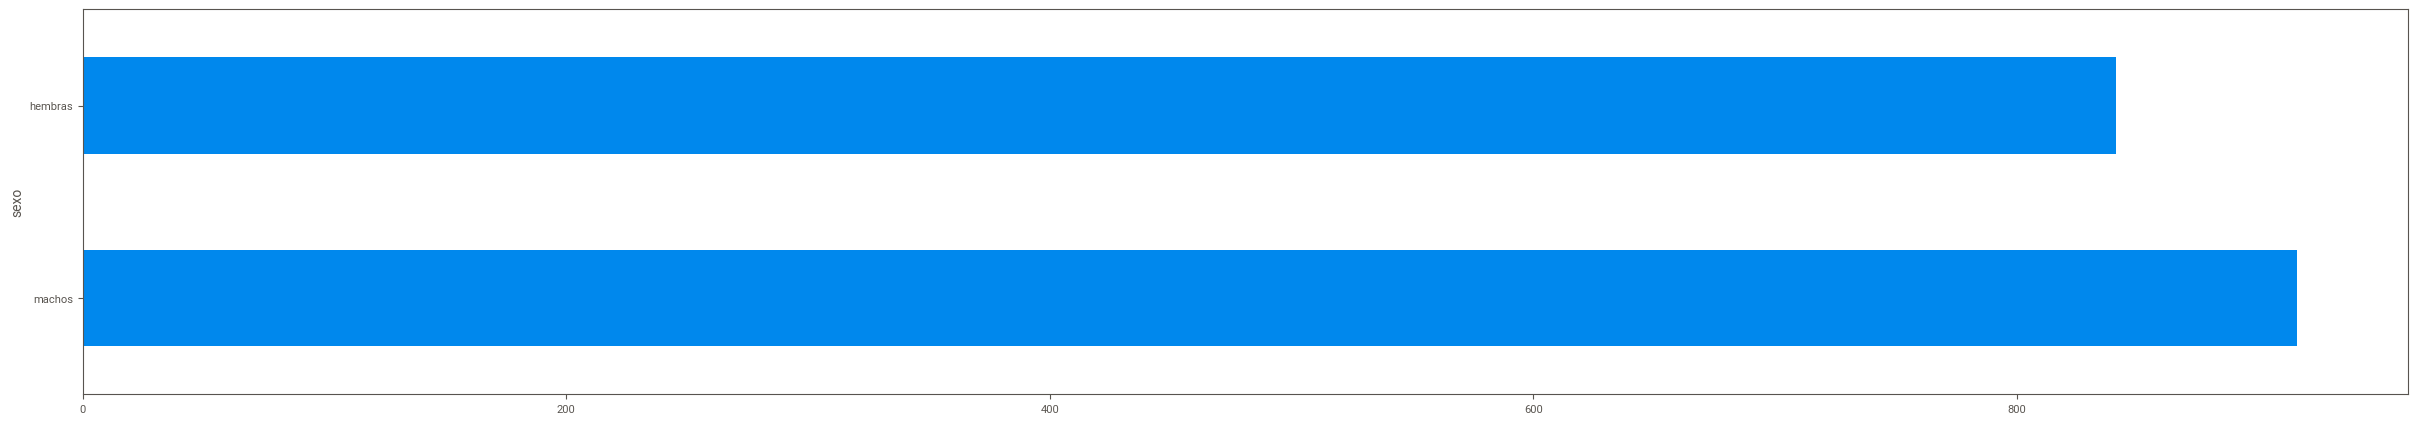

In [137]:
plt.figure(figsize=(30,5))
df['sexo'].value_counts()[:15].plot(kind='barh')

## tipogranja
type: object

In [138]:
df['tipogranja'] = df['tipogranja'].astype(str)
df['tipogranja'] = df['tipogranja'].str.replace('.0','')
df['tipogranja'].unique()

array(['MANUAL', 'AUTOMATICA', 'SEMI AUTOMATICA'], dtype=object)

In [139]:
df['tipogranja'].value_counts()

tipogranja
MANUAL             1438
AUTOMATICA          297
SEMI AUTOMATICA      22
Name: count, dtype: int64

<Axes: ylabel='count'>

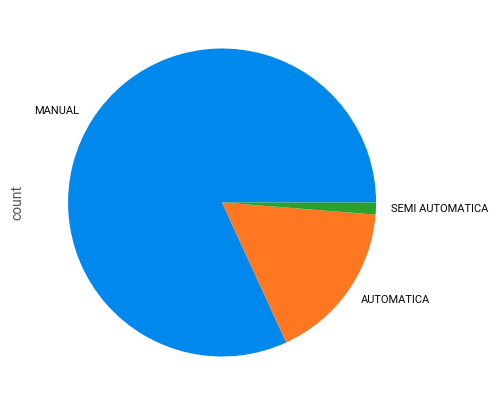

In [140]:
plt.figure(figsize=(10,5))
df['tipogranja'].value_counts()[:15].plot(kind='pie')

<Axes: ylabel='tipogranja'>

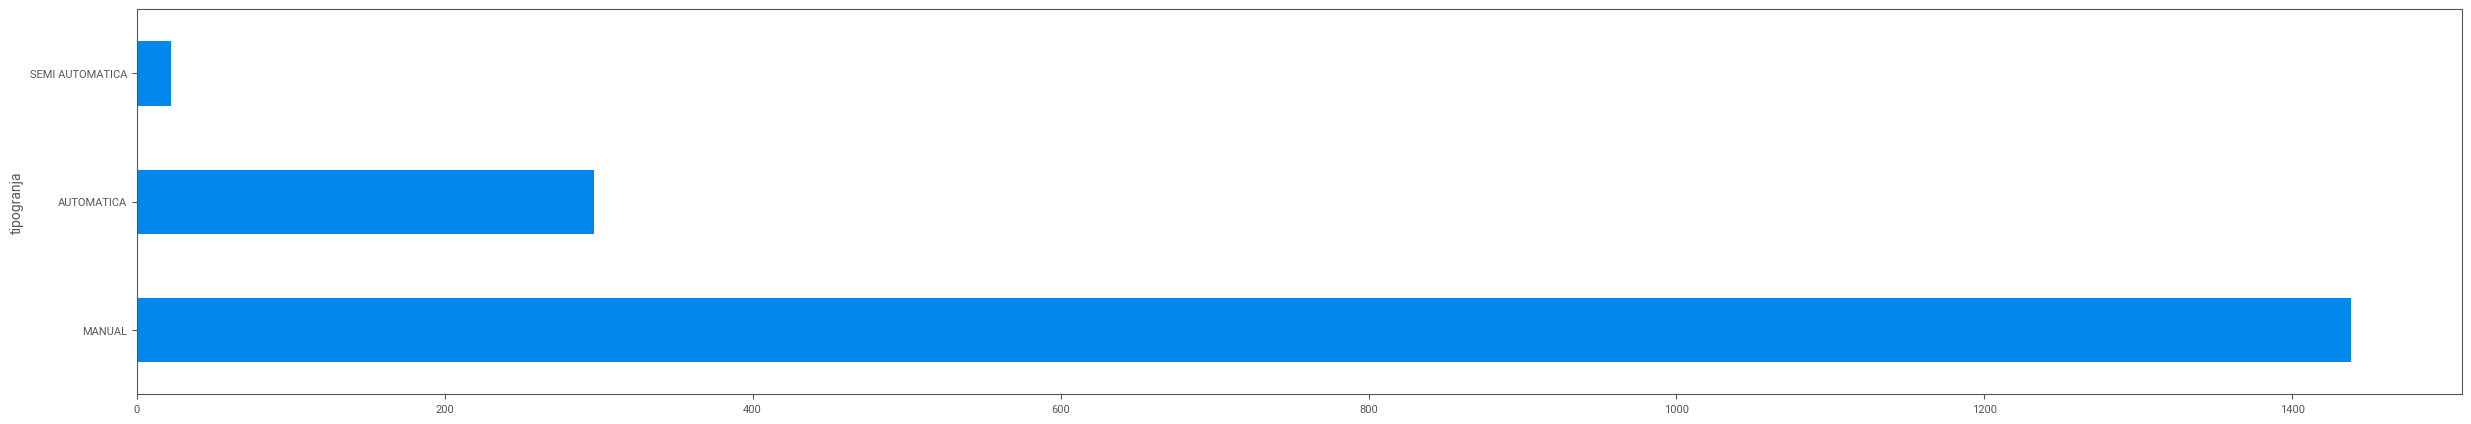

In [141]:
plt.figure(figsize=(30,5))
df['tipogranja'].value_counts()[:15].plot(kind='barh')

## peso
type: float64

In [142]:
df['peso'] = pd.to_numeric(df[f'peso'], errors='coerce')

In [143]:
print('la media es: ',df['peso'].mean())

la media es:  1.7354177575412637


In [144]:
print('la moda es: ',df['peso'].mode())

la moda es:  0    1.83
Name: peso, dtype: float64


In [145]:
print('la mediana es: ',df['peso'].median())

la mediana es:  1.76


In [146]:
print('el valor mínimo de peso es: : ',df['peso'].min())

el valor mínimo de peso es: :  0.155


In [147]:
print('el valor máximo de peso es: : ',df['peso'].max())

el valor máximo de peso es: :  7.0


In [148]:
print('el rango de peso es: : ',df['peso'].max() - df['peso'].min())

el rango de peso es: :  6.845


In [149]:
print('la desviación éstandar de peso es: : ',df['peso'].std())

la desviación éstandar de peso es: :  0.4130890157659111


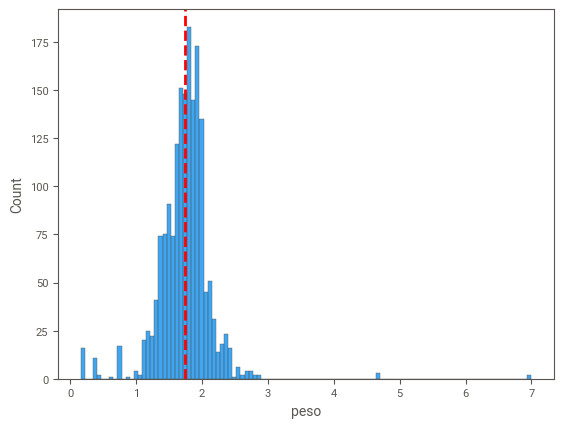

In [150]:
sns.histplot(data = df,x = 'peso')
plt.axvline(x=df['peso'].mean(),color='red',linestyle='dashed',linewidth=2)

# Sweetviz report

In [151]:
path_dir = "C:/Users/USER/OneDrive - universidadean.edu.co/3. Machine learning/Proyecto final/"
sweet_report.show_html(f'{path_dir}sw_report_datos_granja_ok.html')


Report C:/Users/USER/OneDrive - universidadean.edu.co/3. Machine learning/Proyecto final/sw_report_datos_granja_ok.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [152]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt


In [153]:
# Pearson Correlation
def pearson_correlation(df, col1, col2):
    corr, _ = pearsonr(df[col1], df[col2])
    return corr

# Spearman Correlation
def spearman_correlation(df, col1, col2):
    corr, _ = spearmanr(df[col1], df[col2])
    return corr

# Kendall Tau Correlation
def kendall_correlation(df, col1, col2):
    corr, _ = kendalltau(df[col1], df[col2])
    return corr

# Mutual Information (works for numerical features)
def mutual_information(df, target_col, feature_col):
    mi = mutual_info_regression(df[[feature_col]], df[target_col])
    return mi[0]


In [154]:
# Pearson Correlation Heatmap for numerical columns
def pearson_correlation_numerical(df):
    # Filter numerical columns
    numerical_df = filter_numerical_columns(df)

    # Compute Pearson correlation matrix
    corr = numerical_df.corr(method='pearson')

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
    plt.title("Pearson Correlation Heatmap (Numerical Variables Only)")
    plt.show()

    return corr

In [155]:
def plot_scatter_with_regression(df, col1, col2):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=col1, y=col2, data=df, scatter_kws={"s": 50}, line_kws={"color": "red"})
    plt.title(f'Scatter Plot with Regression Line: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fecha        1757 non-null   datetime64[ns]
 1   co           1757 non-null   object        
 2   ciudad       1757 non-null   object        
 3   temperatura  1757 non-null   object        
 4   depto        1757 non-null   object        
 5   consumo      1757 non-null   float64       
 6   unidades     1757 non-null   float64       
 7   edad         1757 non-null   int64         
 8   sexo         1757 non-null   object        
 9   tipogranja   1757 non-null   object        
 10  peso         1757 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 151.1+ KB


In [157]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Normalization for the 'peso' column
def normalize_min_max(df, col):
    scaler = MinMaxScaler()
    df[col + '_min_max_normalized'] = scaler.fit_transform(df[[col]])
    return df

# Normalize the 'peso' column using Min-Max scaling
df = normalize_min_max(df, 'consumo')

Pearson Correlation: -0.18644621753009083
Spearman Correlation: 0.06839267956093688
Kendall Correlation: 0.05709828407847271
Mutual Information: 2.015233426414397


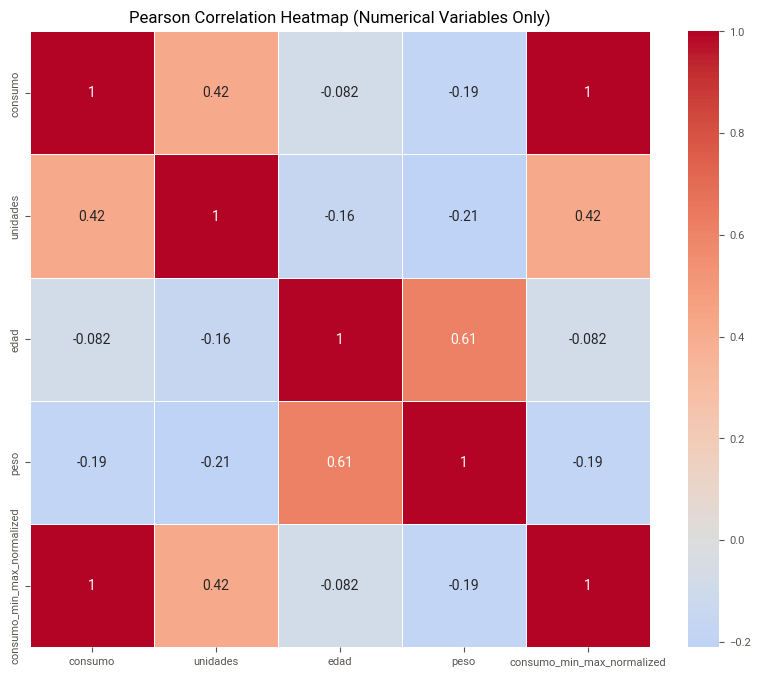

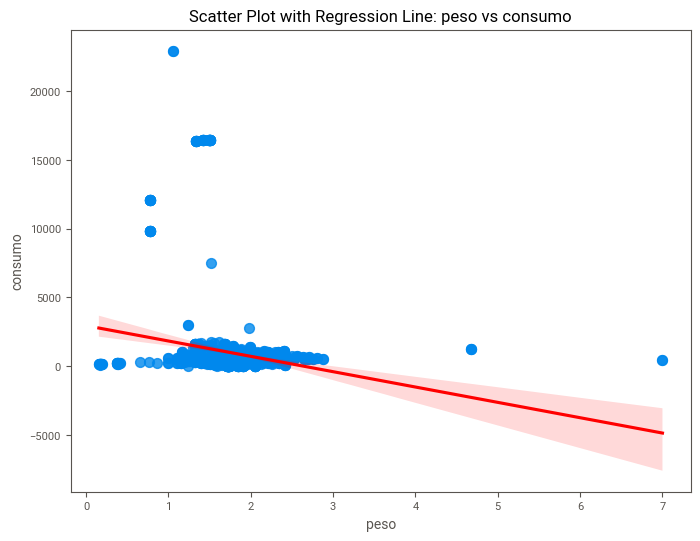

In [158]:
# Pearson correlation between x and y
pearson_corr = pearson_correlation(df, 'peso', 'consumo')
print(f"Pearson Correlation: {pearson_corr}")

# Spearman correlation between x and y
spearman_corr = spearman_correlation(df, 'peso', 'consumo')
print(f"Spearman Correlation: {spearman_corr}")

# Kendall correlation between x and y
kendall_corr = kendall_correlation(df, 'peso', 'consumo')
print(f"Kendall Correlation: {kendall_corr}")

# Mutual Information between x and y (numerical only)
mutual_info = mutual_information(df, 'peso', 'consumo')
print(f"Mutual Information: {mutual_info}")

# Filter only numerical variables in a DataFrame
def filter_numerical_columns(df):
    # Select only numerical columns (int, float)
    return df.select_dtypes(include=[np.number])

# Plot correlation heatmap
pearson_correlation_numerical(df)

# Scatter plot with regression line between x and y
plot_scatter_with_regression(df, 'peso', 'consumo')

In [159]:
!pip install dcor
!pip install minepy

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.6 MB ? eta -:--:--
   ----------------------- ---------------- 1.6/2.6 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/28.1 MB 7.2 MB/s eta 0:00:04
   ---- ----------------------------------- 3.1/28.1 MB 7.7 MB/s eta 0:00:04
   ----- ---------------------------------- 4.2/28.1 MB 7.2 MB/s eta 0:00:04
   -------- ------------------------------- 5.8/28.1 MB 7.2 MB/s eta 0:00:04
   ---------- ----------------------------- 7.3/28.1 MB 7.3 MB/s eta 0:00:03
   ------------- -------------------------- 9.4/28.1 MB 7.4 MB/s eta 0:00:03
   ---------------- ----------------------- 11.5/28.1 MB 8.0 MB/s eta 0:00:03
   -------------------- ------------------- 14.2/28.1 MB 8.3 MB/s eta 0:00:02
   -------------------

In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from dcor import distance_correlation
from minepy import MINE  # For Maximal Information Coefficient (MIC)

# Mean Squared Error (MSE)
def mean_squared_error_metric(df, col1, col2):
    mse = mean_squared_error(df[col1], df[col2])
    return mse

# Mean Absolute Error (MAE)
def mean_absolute_error_metric(df, col1, col2):
    mae = mean_absolute_error(df[col1], df[col2])
    return mae

# R-squared (R²)
def r_squared_metric(df, col1, col2):
    r2 = r2_score(df[col1], df[col2])
    return r2

# Distance Correlation
def distance_correlation_metric(df, col1, col2):
    dcor = distance_correlation(df[col1], df[col2])
    return dcor

# Maximal Information Coefficient (MIC)
def maximal_information_coefficient(df, col1, col2):
    mine = MINE()
    mine.compute_score(df[col1], df[col2])
    return mine.mic()


In [161]:
# Mean Squared Error (MSE) between x and y
mse = mean_squared_error_metric(df, 'peso', 'consumo')
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE) between x and y
mae = mean_absolute_error_metric(df, 'peso', 'consumo')
print(f"Mean Absolute Error: {mae}")

# R-squared (R²) between x and y
r2 = r_squared_metric(df, 'peso', 'consumo')
print(f"R-squared: {r2}")

# Distance Correlation between x and y
dcor = distance_correlation_metric(df, 'peso', 'consumo')
print(f"Distance Correlation: {dcor}")

# Maximal Information Coefficient (MIC) between x and y
mic = maximal_information_coefficient(df, 'peso', 'consumo')
print(f"Maximal Information Coefficient: {mic}")


Mean Squared Error: 7129511.641824827
Mean Absolute Error: 1010.28905721439
R-squared: -41804181.82241216
Distance Correlation: 0.28946077869841413
Maximal Information Coefficient: 0.5042156499136433


1. Mean Squared Error (MSE): 7129511.64
MSE is the average squared difference between the actual and predicted values. It penalizes large errors more heavily because it squares the differences.
A high value like 7129511.64 indicates that the predicted values are quite far off from the actual values on average.
This large error suggests that there is a significant difference between the two variables, meaning that they may not have a strong predictive relationship.
2. Mean Absolute Error (MAE): 1010.29
MAE represents the average absolute difference between the actual and predicted values.
In this case, the MAE is 1010.29, which means that, on average, the difference between the actual and predicted values is about 1010 units.
MAE is generally easier to interpret than MSE because it's in the same units as the data. While still high, it's less sensitive to large errors than MSE.
3. R-squared: -41804181.82
R-squared (R²) measures the proportion of the variance in the dependent variable that is predictable from the independent variable.
Negative R-squared values are possible when the model fits the data very poorly. In your case, R² = -41804181.82 suggests that the model is performing far worse than simply predicting the mean of the target variable. Essentially, the independent variable provides no meaningful predictive power for the dependent variable.
4. Distance Correlation: 0.289
Distance Correlation measures both linear and nonlinear associations. A value of 0 indicates no dependence, while 1 indicates complete dependence.
A value of 0.289 suggests a weak to moderate relationship between the variables. This means there is some degree of dependence, but it's not very strong.
5. Maximal Information Coefficient (MIC): 0.504
MIC is designed to capture both linear and nonlinear relationships between variables. It ranges from 0 (no association) to 1 (perfect association).
A value of 0.504 suggests a moderate relationship between the two variables. This moderate MIC score indicates that there is some meaningful dependency that might not be purely linear.
Summary of the Results:
High Errors (MSE and MAE): The large error values (MSE and MAE) suggest that your model struggles to predict one variable from the other, leading to substantial differences between actual and predicted values.
Negative R-squared: The extremely negative R-squared indicates that your model is performing much worse than random guessing. This points to a very poor fit, where the independent variable provides no useful information to predict the target.
Distance Correlation (0.289) and MIC (0.504): These indicate that while traditional linear correlations are weak or non-existent, there may still be some nonlinear relationship between the variables, as shown by the moderate MIC score.
What This Means:
These results suggest that the relationship between the variables is weak or highly complex, with significant errors in prediction.
Traditional linear models (as implied by the R-squared and high errors) perform poorly here. However, the moderate Distance Correlation and MIC suggest that there could be nonlinear or more complex patterns in the data that require more sophisticated modeling techniques to capture effectively.